<a href="https://colab.research.google.com/github/uzma-knpc/AGENTS/blob/main/FourAgentHandsoff(Homework).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q "openai-agents[viz]"
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [18]:
import os
from agents import Agent, Runner, AsyncOpenAI,set_default_openai_api,set_default_openai_client,set_tracing_disabled,function_tool
from agents.run import RunConfig # Global level set_default_openai
from google.colab import userdata

In [15]:
gemini_api_key = userdata.get("GOOGLE_API_KEY_2")
#Global level setting

set_tracing_disabled(True)
set_default_openai_api("chat_completions")
#set_default_openai_client("chat_completions")

# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
set_default_openai_client(external_client)

model = OpenAIChatCompletionsModel(
    model="gemini-1.5-flash",
    openai_client=external_client
)
config = RunConfig(       #not need now
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

In [33]:
from agents import enable_verbose_stdout_logging # to see every activity

@function_tool
def Dev_OPS(task: str) -> str:
  """Return task of DEVOPS i.e coding, writting, packing, deploying
  args:
  task:task name

  Returns:
  task of Devops
  """
    #print(f"[debug] getting weather for {city}")
  return f"The task is  {task} is Coding."

@function_tool
def Openai_agents(framework: str) -> str:
  """Return OPENAI frame work web development agentframe, swarm agentframe, desktop agentframe
  Args:
  framwork:look up the agent

  Returns:
  framework of OPENAI
  """
    #print(f"[debug] getting weather for {city}")
  return f"opwn ai framework {Framework}."

In [37]:
from agents import enable_verbose_stdout_logging
enable_verbose_stdout_logging()

Web_Expert: Agent= Agent(name="Web Assistant",
                                 instructions="You are a helpful web assistant you answer all about web development",
                                 model=model,
                                 handoff_description="Web Expert")

Mobile_Dev: Agent= Agent(name="Mobile Assistant",
                                 instructions="You are a helpful mobile expert and  you answer all about Mobile Development",
                                 model=model,
                                 handoff_description="Mobile Expert")
Agentic_AI_Expert: Agent= Agent(name="Agentic AI Assistant",
                                 instructions="You are a helpful Agentic ai assistant  and  you answer all about Agentic AI",
                                 model=model,
                                 tools=[Openai_agents,Dev_OPS],
                                 handoff_description="Agentic AI Expert")


Pana_cloud: Agent= Agent(name="PanaCloud ",
                                 instructions="You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
                                 model=model,
                                 handoff_description="PanaCloud",
                                 handoffs=[Web_Expert,Mobile_Dev,Agentic_AI_Expert])

                                 #tools=[get_weather,get_current_news])
result = Runner.run_sync(Pana_cloud, "can i tell TOOLs or Functions as agent?")
print("\nCALLING AGENT\n")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a3366450>


Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)
Running agent PanaCloud  (turn 1)


DEBUG:openai.agents:Running agent PanaCloud  (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3365cd0>


[
  {
    "content": "You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
    "role": "system"
  },
  {
    "role": "user",
    "content": "can i tell TOOLs or Functions as agent?"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_web_assistant",
      "description": "Handoff to the Web Assistant agent to handle the request. Web Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_assistant",
      "description": "Handoff to the Mobile Assistant agent to handle the request. Mobile Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {


DEBUG:openai.agents:[
  {
    "content": "You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
    "role": "system"
  },
  {
    "role": "user",
    "content": "can i tell TOOLs or Functions as agent?"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_web_assistant",
      "description": "Handoff to the Web Assistant agent to handle the request. Web Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_assistant",
      "description": "Handoff to the Mobile Assistant agent to handle the request. Mobile Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function"

LLM resp:
{
  "content": "Yes, you can think of the available functions (`transfer_to_web_assistant`, `transfer_to_mobile_assistant`, `transfer_to_agentic_ai_assistant`) as agents.  Each function represents a different type of assistant that can handle your request.  I will use the appropriate agent based on your needs.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Yes, you can think of the available functions (`transfer_to_web_assistant`, `transfer_to_mobile_assistant`, `transfer_to_agentic_ai_assistant`) as agents.  Each function represents a different type of assistant that can handle your request.  I will use the appropriate agent based on your needs.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Yes, you can think of the available functions (`transfer_to_

DEBUG:openai.agents:LLM resp:
{
  "content": "Yes, you can think of the available functions (`transfer_to_web_assistant`, `transfer_to_mobile_assistant`, `transfer_to_agentic_ai_assistant`) as agents.  Each function represents a different type of assistant that can handle your request.  I will use the appropriate agent based on your needs.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace



CALLING AGENT

Yes, you can think of the available functions (`transfer_to_web_assistant`, `transfer_to_mobile_assistant`, `transfer_to_agentic_ai_assistant`) as agents.  Each function represents a different type of assistant that can handle your request.  I will use the appropriate agent based on your needs.



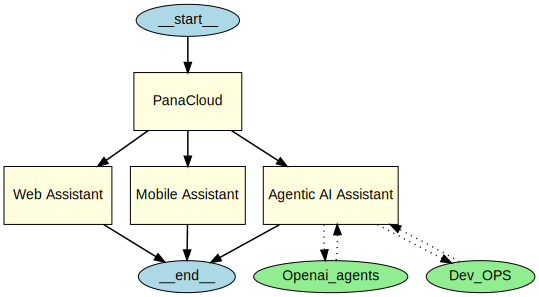

In [39]:
from agents.extensions.visualization import draw_graph

draw_graph(Pana_cloud)

In [38]:
result.last_agent.name

'PanaCloud '